Ejemplos de la aplicacion de metodos para reducir dimensionalidad de un conjunto de datos. Este codigo es una simplificacion y adaptacion de los ejemplos en: https://github.com/aapatel09/handson-unsupervised-learning desarrollado por Ankur Patel, para el curso de introduccion a aprendizaje de maquinas de la maestria en ingenieria de la Universidad del Magdalena. 
Los ejemplos utilizan el conjunto de datos MNIST de digitos escritos a manos, creada por Yann LeCun, Corinna Cortes, y Christopher J.C. Burges, http://yann.lecun.com/exdb/mnist/

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

In [2]:
# Load the datasets
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'mnist_data', 'mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [3]:
# Verify shape of datasets
print("El conjunto de datos para entrenamiento contiene %d ejemplos con %d caracteristicas" % 
      (X_train.shape[0], X_train.shape[1]))
print("El conjunto de datos para validacion contiene %d ejemplos con %d caracteristicas" % 
      (X_validation.shape[0], X_validation.shape[1]))
print("El conjunto de datos para prueba contiene %d ejemplos con %d caracteristicas" % 
      (X_test.shape[0], X_test.shape[1]))


El conjunto de datos para entrenamiento contiene 50000 ejemplos con 784 caracteristicas
El conjunto de datos para validacion contiene 10000 ejemplos con 784 caracteristicas
El conjunto de datos para prueba contiene 10000 ejemplos con 784 caracteristicas


In [4]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [5]:
# Describe the training matrix
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [6]:
# Show the labels
y_train.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [7]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

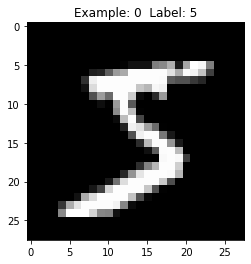

In [8]:
# View the first digit
view_digit(0)

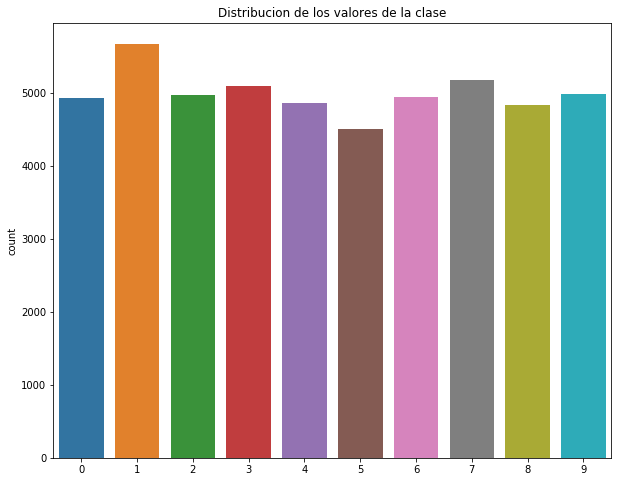

In [9]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(y_train)
plt.title("Distribucion de los valores de la clase")
plt.show()

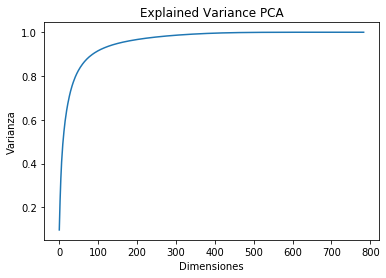

In [10]:
# Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA()

X_train_PCA = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Dimensiones')
plt.ylabel('Varianza')
plt.title("Explained Variance PCA")
plt.show()
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [11]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999839005775


In [12]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 20 Principal Components:  [0.6439795]
Variance Captured by First 50 Principal Components:  [0.8248605]
Variance Captured by First 100 Principal Components:  [0.91465837]
Variance Captured by First 200 Principal Components:  [0.9665007]
Variance Captured by First 300 Principal Components:  [0.9862489]


In [13]:
def scatterPlot(xDF, yDF, algoName, col1, col2):
    tempDF = pd.DataFrame(data=xDF.loc[:,[col1,col2]], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    v1 = f"Vector_{col1}"
    v2 = f"Vector_{col2}"
    tempDF.columns = [v1, v2, "Label"]
    sns.lmplot(x=v1, y=v2, hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

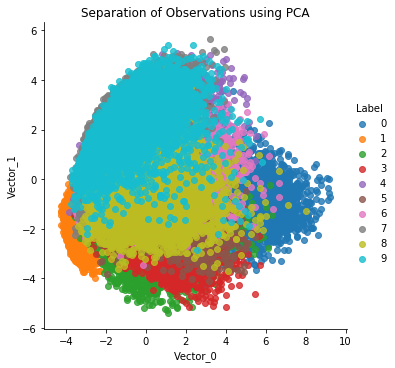

In [14]:
scatterPlot(X_train_PCA, y_train, "PCA", 0, 1)

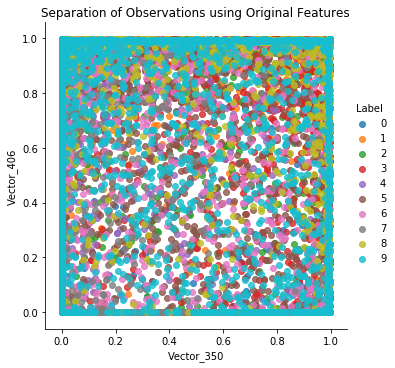

In [15]:
scatterPlot(X_train, y_train, "Original Features", 350, 406)

In [16]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 200
kernel = 'rbf'

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = \
    pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)


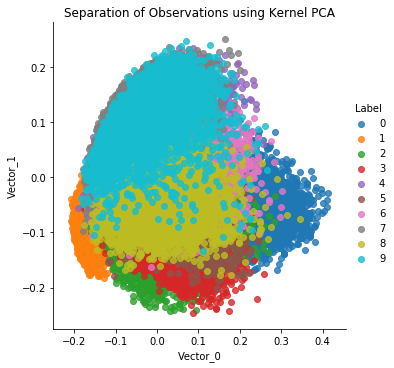

In [17]:
scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA", 0, 1)

In [18]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 20
n_components = 10
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
        n_components=n_components, method=method, \
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

(50000, 10)


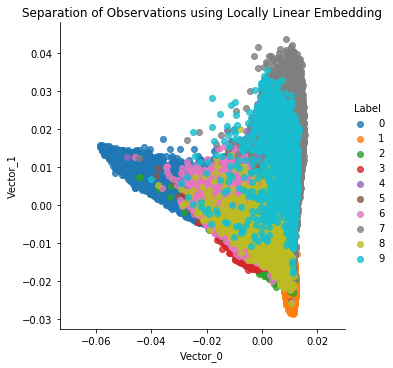

In [53]:
print(X_train_lle.shape)
scatterPlot(X_train_lle, y_train, "Locally Linear Embedding", 0, 1)

(50000, 100)


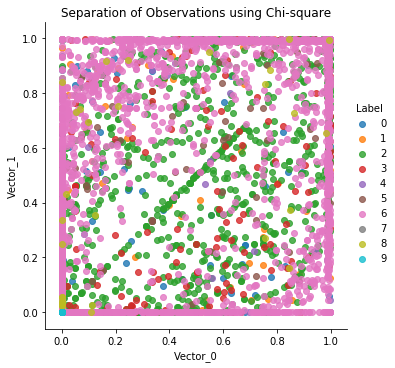

In [20]:
#Seleccionando caracteristicas con Chi-Square test

from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=100)

X_train_kbest_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_train_kbest_chi2 = pd.DataFrame(data=X_train_kbest_chi2, index=train_index)

print(X_train_kbest_chi2.shape)
scatterPlot(X_train_kbest_chi2, y_train, "Chi-square", 0, 1)

#X_validation_kbest_chi2 = chi2_selector.transform(X_validation)
#X_validation_kbest_chi2 = pd.DataFrame(data=X_validation_kbest_chi2, index=validation_index)

